In [62]:
# Librerias
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [3]:
CBP = pd.read_csv('https://media.githubusercontent.com/media/Gonzalo-Ariel-Alonso/Proyecto_Data_Science/master/Company%20Bankruptcy%20Prediction.csv')
CBP

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


### Escalado de datos
Para evitar cualquier tipo de sesgo numerico por la diferencia de dimenciones, llevamos todos los datos a la misma escala.

In [4]:
# Escalado de datos
from sklearn.preprocessing import MinMaxScaler as MMS
scaler = MMS()
CBP_scaled = scaler.fit_transform(CBP)
CBP_scaled = pd.DataFrame(CBP_scaled, columns = list(CBP.columns))

## Variables mas importantes

In [5]:
CBP_scaled_filtered = CBP_scaled[['Bankrupt?',' Debt ratio %',' Current Liability to Assets',' Net Income to Total Assets',' ROA(A) before interest and % after tax',' Net worth/Assets',' Persistent EPS in the Last Four Seasons']]
CBP_scaled_filtered

,Bankrupt?,Debt ratio %,Current Liability to Assets,Net Income to Total Assets,ROA(A) before interest and % after tax,Net worth/Assets,Persistent EPS in the Last Four Seasons
0,1.0,0.207576,0.147308,0.716845,0.424389,0.792424,0.169141
1,1.0,0.171176,0.056963,0.795297,0.538214,0.828824,0.208944
2,1.0,0.207516,0.098162,0.774670,0.499019,0.792484,0.180581
3,1.0,0.151465,0.098715,0.739555,0.451265,0.848535,0.193722
4,1.0,0.106509,0.110195,0.795016,0.538432,0.893491,0.212537
...,...,...,...,...,...,...,...
6814,0.0,0.124618,0.103838,0.799927,0.539468,0.875382,0.216602
6815,0.0,0.099253,0.089901,0.799748,0.538269,0.900747,0.216697
6816,0.0,0.038939,0.024414,0.797778,0.533744,0.961061,0.210929
6817,0.0,0.086979,0.083199,0.811808,0.559911,0.913021,0.228326


Ya tenemos las 6 variables mas influyentes sobre la bancarrota en nuestro dataset, ahora separemos la variable independiente (Bankrupt?) de las dependientes:

In [6]:
x = CBP_scaled_filtered.iloc[:,1:]
y = CBP_scaled_filtered.iloc[:,0]

## Oversampling / Balanceo de clases
Tenemos dos tipos de clases, companias en bancarrota y operativas, no obstante la muestra de companias operativas en mucho mayor a la de bancarrota, para evistar cualquier tipo de sesgo de nuestro modelo utilizaremos el metodo de oversampling con la libreria de imblearn.

In [7]:
from collections import Counter

# Muestra desbalanceada
count = Counter(y)
count

Counter({0.0: 6599, 1.0: 220})

In [8]:
from imblearn.over_sampling import SMOTE
os = SMOTE()
x_os , y_os = os.fit_resample(x,y)

# Muestra balanceada
count = Counter(y_os)
count

Counter({1.0: 6599, 0.0: 6599})

## Regrecion Logistica
Nuestro dataset nos precenta un problema de clacificaion binaria, asi que para entrenar un modelo de machine learning podemos utilizar el algoritmo de regresion logistica.

In [9]:
# Separacion de datos de prueba y entrenamiento
X_train, X_test , y_train , y_test = train_test_split(x_os , y_os ,test_size = 0.2)

### Hiperparametros
Utilizando la funcion grid search de sklearn podemos probrar diferentes parametros en nuestro modelo para encotrar cuales son los que dan mejores resultados.

In [56]:
from sklearn.model_selection import GridSearchCV
# Hiperparametros
params = {
    'penalty':['l1', 'l2', 'elasticnet'],
    'C': [0.5,0.75,1.0,1.5,1.75,2.0,2.25],
    'intercept_scaling': [0.5,0.75,1.0,1.75,1.5],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag', 'saga'],
    'max_iter': [1000]
}

LR = LogisticRegression()

grid_logistic_regression = GridSearchCV(estimator = LR,
                                        param_grid = params,
                                        scoring = 'neg_mean_absolute_error',
                                        cv = 5,
                                        verbose = 1,
                                        n_jobs = -1,
)

In [57]:
%%time
grid_logistic_regression.fit(X_train,y_train)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1750 fits failed out of a total of 3150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
175 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    r

CPU times: total: 5.39 s
Wall time: 2min 26s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.5, 0.75, 1.0, 1.5, 1.75, 2.0, 2.25],
                         'intercept_scaling': [0.5, 0.75, 1.0, 1.75, 1.5],
                         'max_iter': [1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='neg_mean_absolute_error', verbose=1)

In [58]:
grid_logistic_regression.best_params_

{'C': 2.0,
 'intercept_scaling': 0.5,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'saga'}

### Entrenamiento refinado

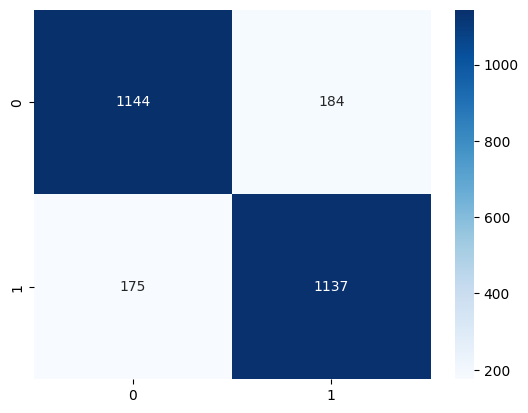

In [63]:
LR_best_params =  LogisticRegression(C= 2.0,
 intercept_scaling= 0.5,
 max_iter= 1000,
 penalty= 'l1',
 solver= 'saga')
LR_best_params .fit(X_train,y_train)

# Prediccion 2
y_pred_2 = LR_best_params.predict(X_test)

# Matriz de confucion
cm_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(data = cm_2, annot = True,cmap='Blues', fmt='g')
plt.show()

In [60]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1328
         1.0       0.86      0.87      0.86      1312

    accuracy                           0.86      2640
   macro avg       0.86      0.86      0.86      2640
weighted avg       0.86      0.86      0.86      2640

